 ***
<a id='lesson-4'></a>
# Lesson-4: Molecular Dynamics
***
- Molecular Dynamics is essentially the application of the Newtons Second Law to molecules, where the force acting on each part of the molecule is computed by modelling its interaction with every other part of the system.
- Total potential energy of the system: 
$$ U = \sum_{i\in\{bonds\}} \frac{1}{2} k_{b,i} (d_i - d_{0,i})^2 + \sum_{i\in\{angles\}} \frac{1}{2} k_{a,i} (\theta_i - \theta_{0,i})^2 + \\ \sum_{i\in\{dihedrals\}} \phi ( cos(n\theta_i)-1)  +  \sum_{i,j\in\{non-bond~pairs\}} \left( U_{LJ}(i,j) +  U_{Columbic}(i,j)\right)
$$
- Equations of motion given by:
$$ \frac{d\vec{p}_i}{dt} = \vec{F}_i \\ \frac{d \vec{r}_i}{dt} = \vec{p}_i/m_i $$
- Euler Method:
$$ \vec{p}_i(t+dt) = \vec{p}_i(t) + dt~\vec{F}_i(t) \\ \vec{r}_i(t+dt)=\vec{r}_i(t) + dt\vec{p}_i/m_i
$$
where the atom index $i \in [1,N]$
- Check on accuracy: constant total energy, total linear momentum
- Example: Simple harmonic oscillator

## Example: Argon
Argon atom is electrically neutral and a good model for the pair-wise interaction between two Argon atoms is given by Lennard-Jones potential, whose functional form is given by:
$$ U_{LJ} (\vec{r}_i,\vec{r}_j) = 4 \epsilon \left( \left(\frac{\sigma}{r} \right)^{12}- \left(\frac{\sigma}{r} \right)^6 \right)  $$
where $\vec{r} = \vec{r}_i - \vec{r}_j$ and $r=|\vec{r}|$. The force on particle $i$ due to its interaction via LJ potenital with particle $j$ is then given by: $$-\left( \frac{\partial U_{LJ}}{\partial x_i}, \frac{\partial U_{LJ}}{\partial y_i},\frac{\partial U_{LJ}}{\partial z_i} \right)$$
And the total potential of the system of $N$ Argon atoms is sum of all the pairwise interactions, i.e.,
$$ U = \frac{1}{2} \sum_{i,j=1, i\ne j}^N U_{LJ} (\vec{r}_i,\vec{r}_j) $$
Using the Euler method mentioned above, write a program to compute the trajectory of the system! 

Following functions might need to be written:

- `initialise_config`
- `initialise_momenta`
- `compute_force`, `compute_pairwiseLJ(i, j, sigma, epsilon)`
- `compute_totalEnergy`, `compute_energy_pairwiseLJ(i, j, sigma, epsilon)`
- `euler_integrate(timestep)`



## Initialisations

In [1]:
import numpy

NUM_PARTICLES = 81
NUM_DIMENSIONS = 3

SHAPE = (NUM_PARTICLES, NUM_DIMENSIONS)

SIGMA = 3
EPSILON = 0.01

MASS = 1e-21

DT = 1e-20

rng = numpy.random.default_rng()

positions = numpy.zeros(SHAPE)
momenta = numpy.zeros(SHAPE)


## Init config function (task 1)

In [2]:
def initialise_config():
    for i in range(NUM_PARTICLES):
        for j in range(NUM_DIMENSIONS):
            positions[i, j] = rng.normal()


## Init momenta function (task 2)

In [3]:
MOMENTA_SCALE = 0.1

def initialise_momenta():
    for i in range(NUM_PARTICLES):
        for j in range(NUM_DIMENSIONS):
            momenta[i, j] = MOMENTA_SCALE * rng.normal()

## Force calculating function (task 3)

In [4]:
import math


def compute_pairwise_lj(i, j, sigma, epsilon):
    dir = positions[i] - positions[j]
    r = numpy.linalg.norm(dir)
    sigma_by_r = sigma / r
    force = (
        48 * epsilon * (math.pow(sigma_by_r, 12) - 0.5 * math.pow(sigma_by_r, 6)) / r
    )
    # scale magnitude of force with normalized direction vector
    return force * (dir / r)


def compute_force():
    total_force = numpy.zeros(SHAPE)
    for i in range(len(positions)):
        for j in range(i + 1, len(positions)):
            force = compute_pairwise_lj(i, j, SIGMA, EPSILON)
            total_force[i] -= force
            total_force[j] += force

    return total_force


## Total energy calculator (task 4)

In [5]:
import math


def compute_energy_pairwise_lj(i, j, sigma, epsilon):
    r = numpy.linalg.norm(positions[i] - positions[j])
    sigma_by_r = sigma / r
    energy = 4 * epsilon * (math.pow(sigma_by_r, 12) - math.pow(sigma_by_r, 6))
    return energy


def compute_energy_at_i(i):
    energy = 0
    for j in range(len(positions)):
        if j != i:
            energy += compute_energy_pairwise_lj(i, j, SIGMA, EPSILON)
    return energy


def compute_energy():
    total_energy = 0
    for i in range(len(positions)):
        for j in range(i + 1, len(positions)):
            total_energy += compute_energy_pairwise_lj(i, j, SIGMA, EPSILON)

    return total_energy


## Euler integrate function (task 5)

This does one step of the integration, with `timestep` interval

In [6]:
def euler_integrate(timestep=DT):
    total_force = compute_force()
    for i in range(NUM_PARTICLES):
        momenta[i] += timestep * total_force[i]
        positions[i] += timestep * momenta[i] / MASS


## Plots

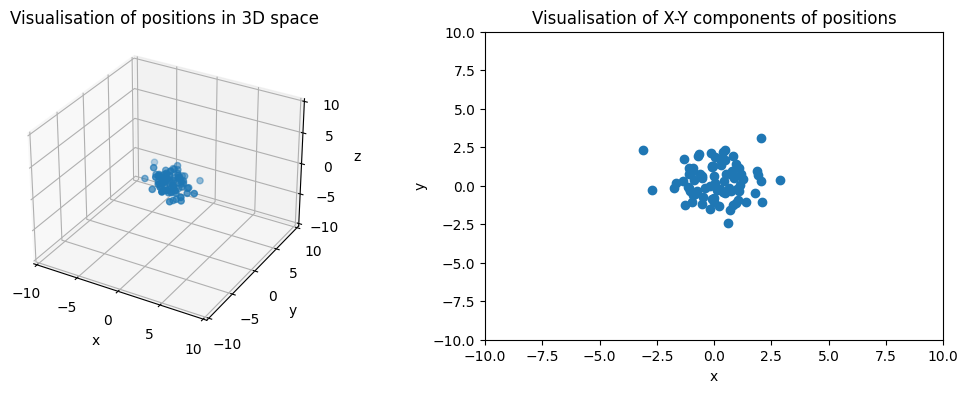

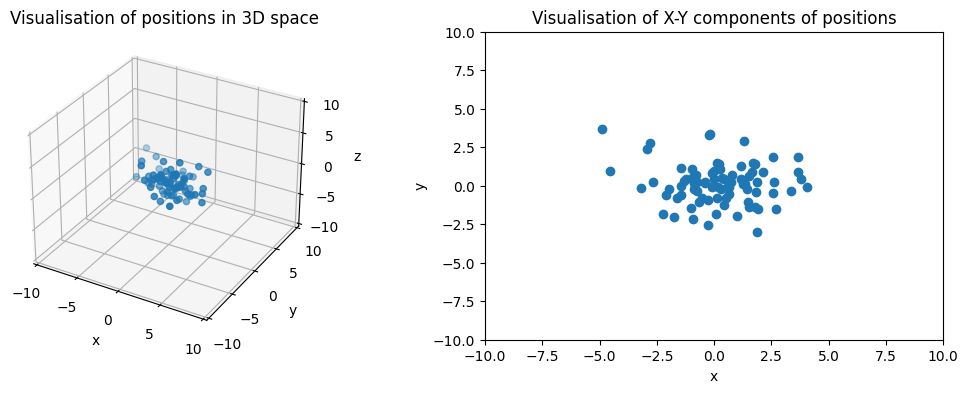

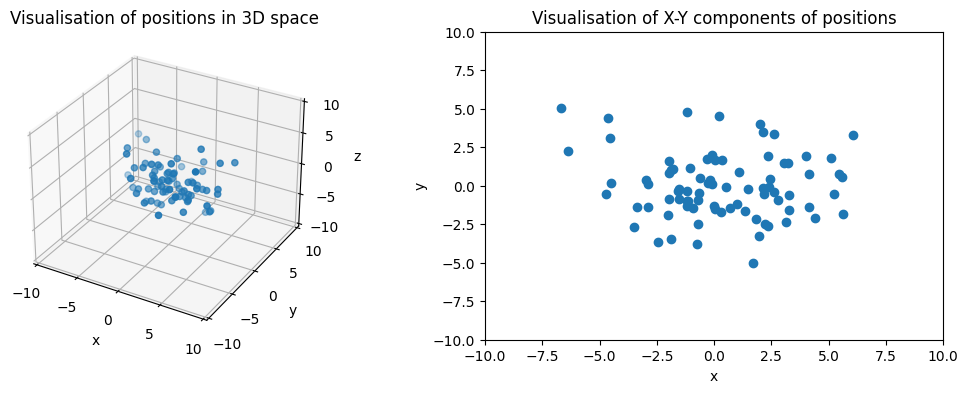

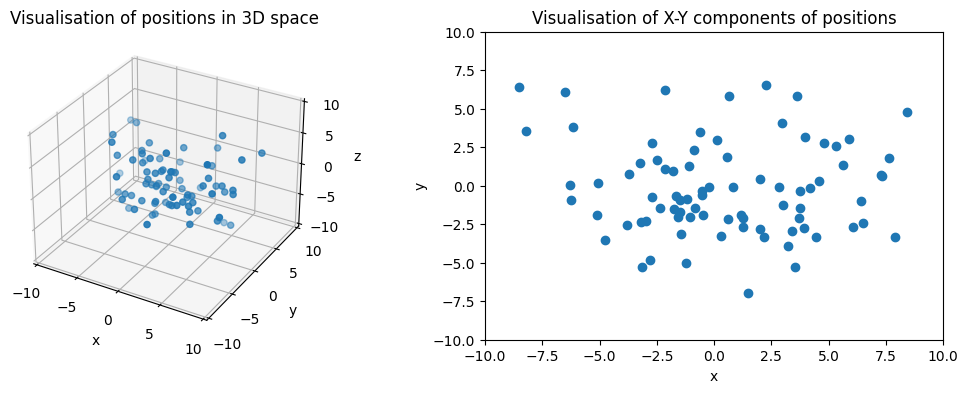

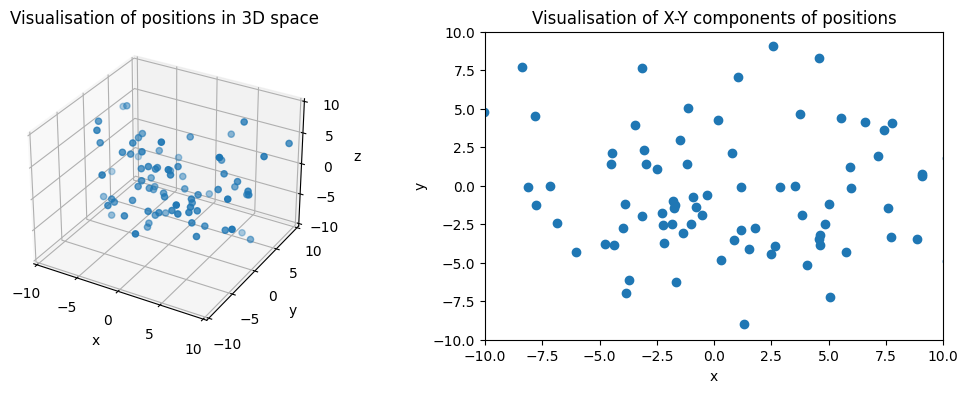

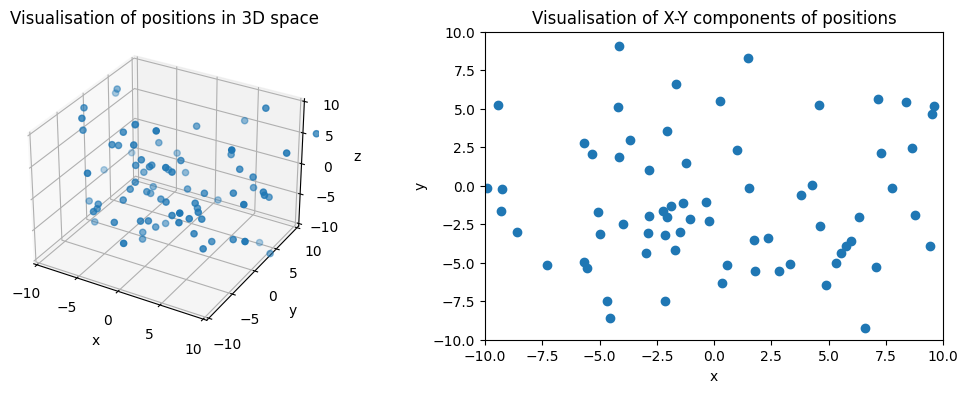

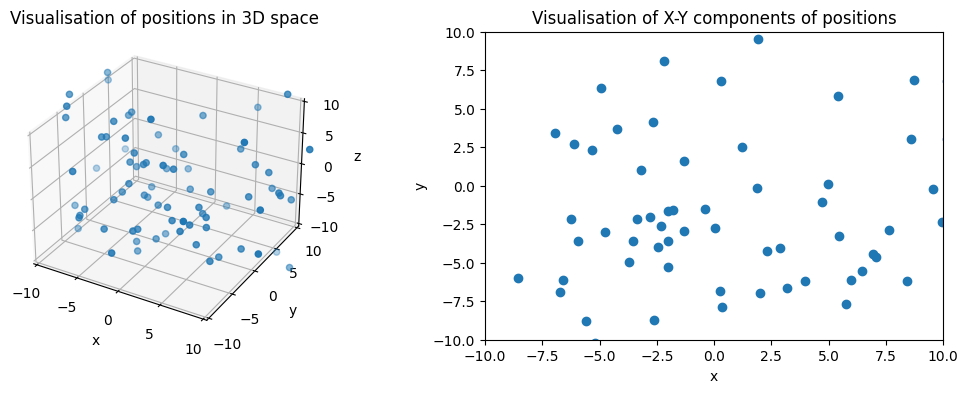

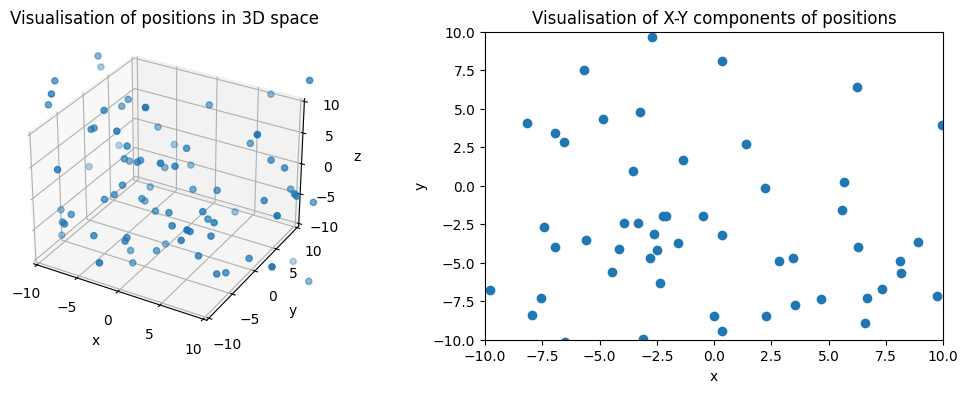

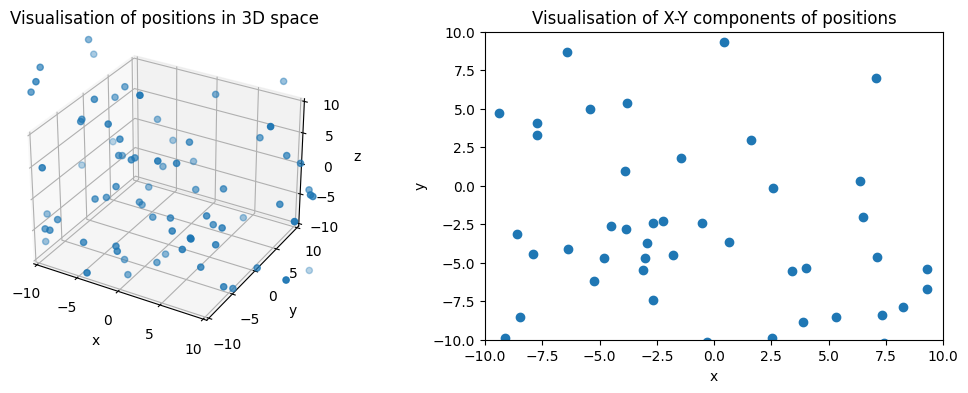

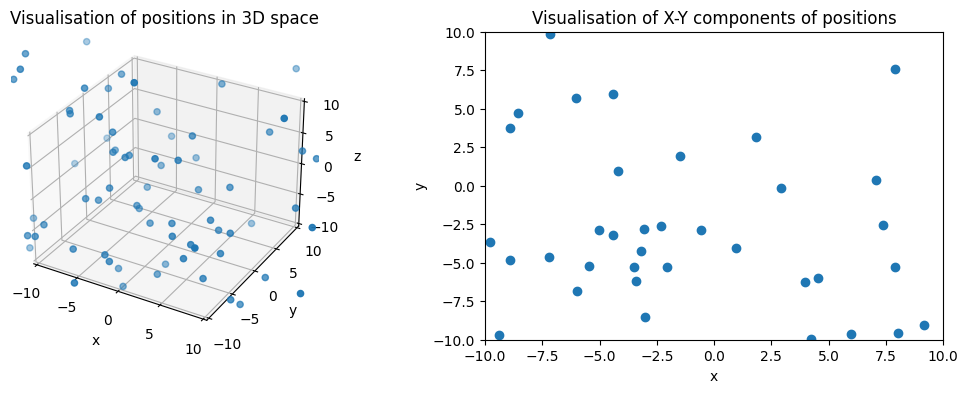

In [7]:
import matplotlib.pyplot as plt

NUM_STEPS = 10

initialise_config()
initialise_momenta()

for i in range(NUM_STEPS):
    plt.figure(figsize=(13, 4))

    for is_2d in range(2):
        if is_2d:
            ax = plt.subplot(122)
            ax.scatter(positions[:, 0], positions[:, 1])
            ax.set_title("Visualisation of X-Y components of positions")
        else:
            ax = plt.subplot(121, projection="3d")
            ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2])
            ax.set_title("Visualisation of positions in 3D space")

        ax.set_xlim(-10, 10)
        ax.set_xlabel("x")
        ax.set_ylim(-10, 10)
        ax.set_ylabel("y")
        if not is_2d:
            ax.set_zlim(-10, 10)
            ax.set_zlabel("z")

    plt.show()
    euler_integrate()


Here we observe that the atoms drift apart over the iterations. This happens because initially the atoms arranged randomly are too close to one another, and the force is repulsive at close range.

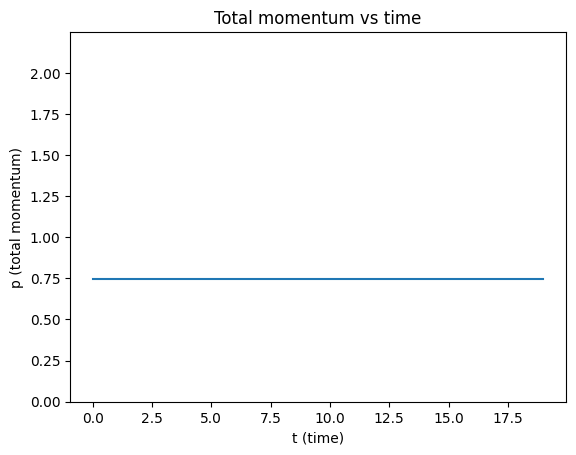

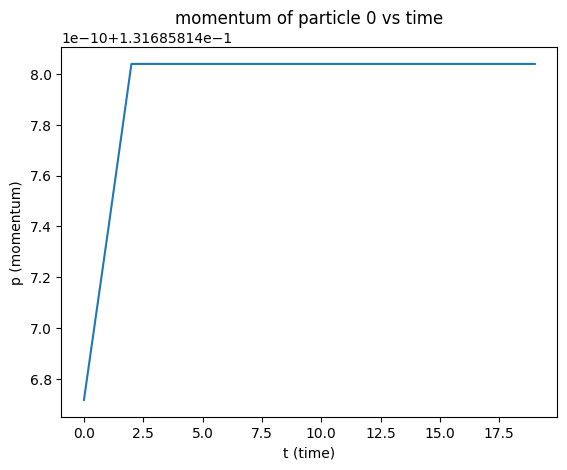

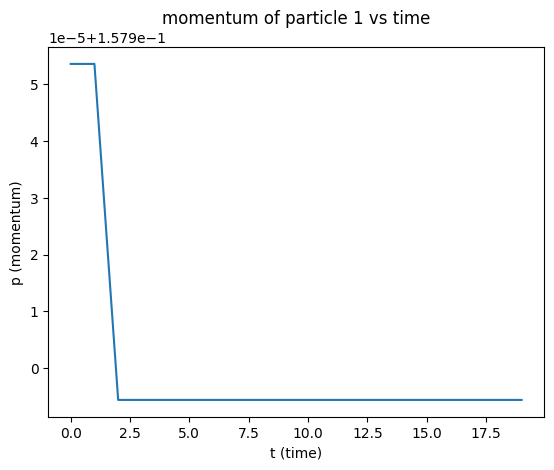

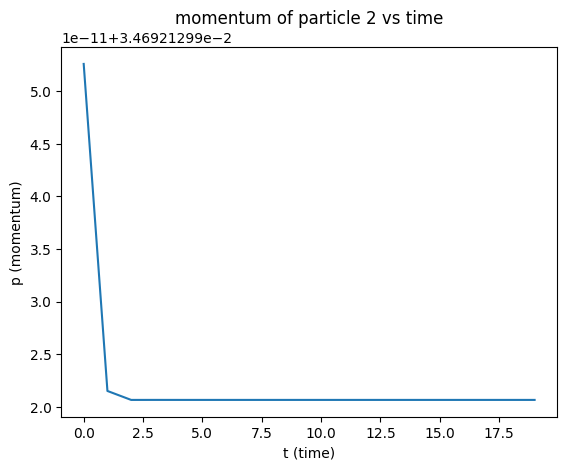

In [8]:
NUM_STEPS = 20


initialise_config()
initialise_momenta()
totals = []
individuals_3 = ([], [], [])
for i in range(NUM_STEPS):
    totals.append(numpy.linalg.norm(numpy.sum(momenta, axis=0)))
    for j in range(3):
        individuals_3[j].append(numpy.linalg.norm(momenta[j]))

    euler_integrate()

plt.plot(totals)
plt.ylim((0, max(totals) * 3))
plt.xlabel("t (time)")
plt.ylabel(f"p (total momentum)")
plt.title(f"Total momentum vs time")
plt.show()

for i in range(3):
    plt.plot(individuals_3[i])
    plt.xlabel("t (time)")
    plt.ylabel(f"p (momentum)")
    plt.title(f"momentum of particle {i} vs time")
    plt.show()


As expected, total momentum is a straight horizontal line. This follows from the conservation of momentum, total momentum is a time independent constant for given starting conditions.

However, as seen from the plots of momenta of individual particles, they are free to change over time (this happens due to interactions with other particles in the system)

In [9]:
def compute_kinetic_energy_at_i(i):
    return numpy.sum(momenta[i]**2) / (2 * MASS)

def compute_kinetic_energy():
    return numpy.sum([compute_kinetic_energy_at_i(i) for i in range(NUM_PARTICLES)])

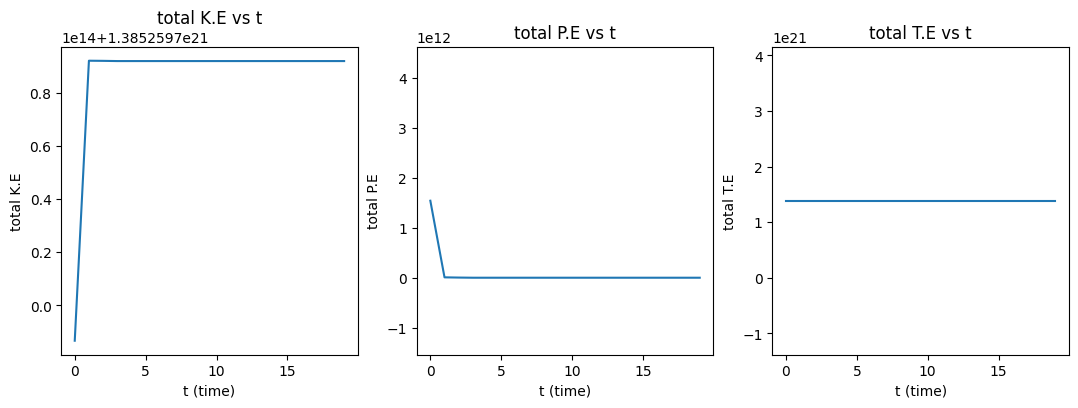

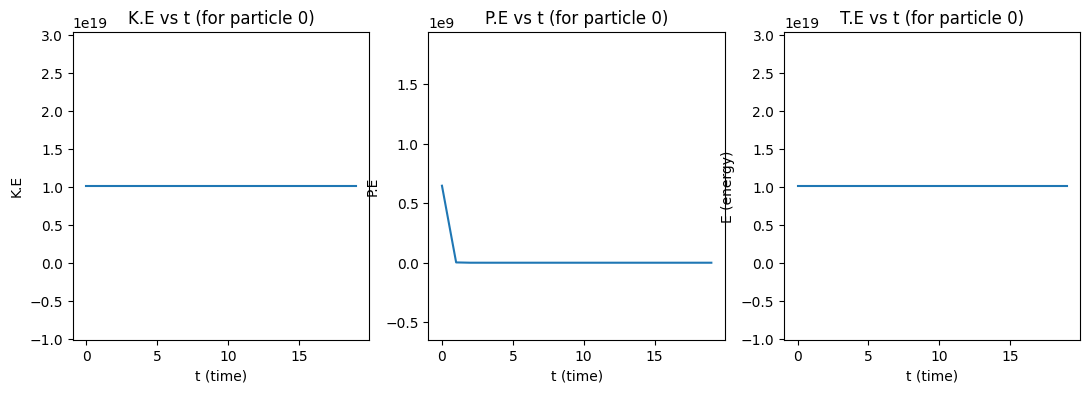

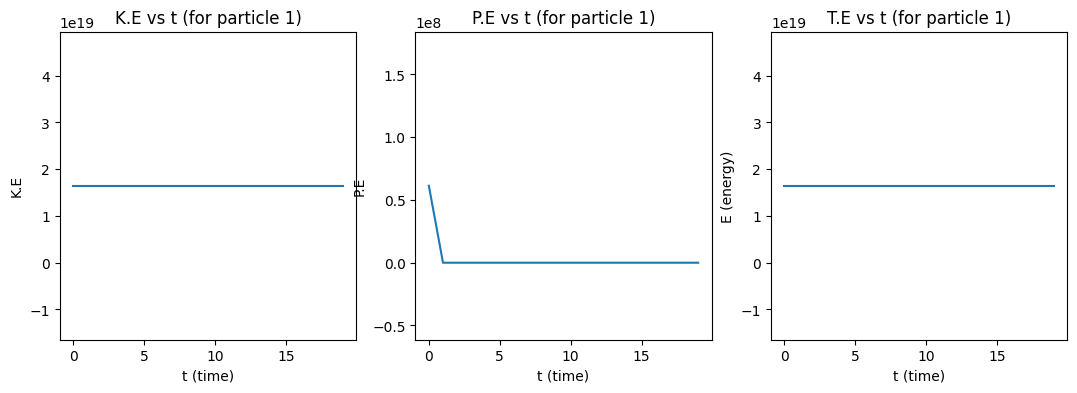

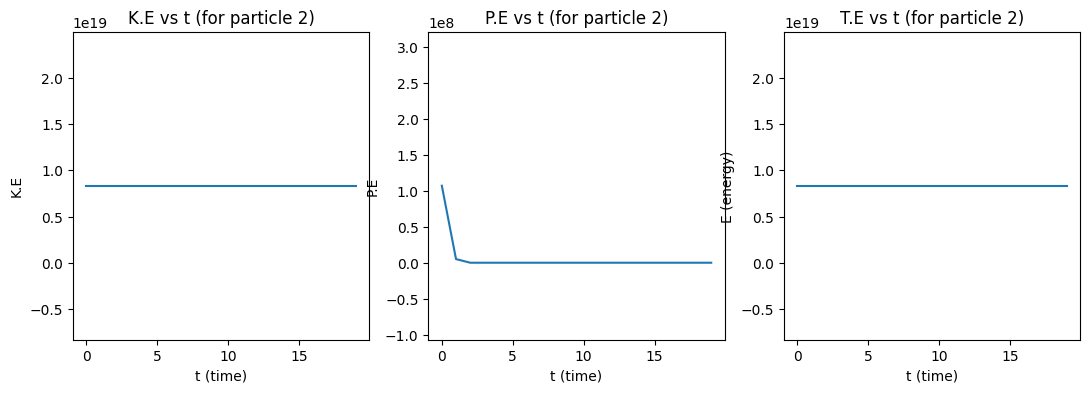

In [10]:
NUM_STEPS = 20

NUM_INDIVIDUAL_SAMPLES = 3

x_vals = list(range(NUM_STEPS))

totals = {
    "K.E": numpy.zeros(NUM_STEPS),
    "P.E": numpy.zeros(NUM_STEPS),
}

individuals = {
    "K.E": numpy.zeros((NUM_STEPS, NUM_INDIVIDUAL_SAMPLES)),
    "P.E": numpy.zeros((NUM_STEPS, NUM_INDIVIDUAL_SAMPLES)),
}

initialise_config()
initialise_momenta()
for i in x_vals:
    totals["P.E"][i] = compute_energy()
    totals["K.E"][i] = compute_kinetic_energy()
    for j in range(3):
        individuals["P.E"][i][j] = compute_energy_at_i(j)
        individuals["K.E"][i][j] = compute_kinetic_energy_at_i(j)
    
    euler_integrate()

totals["T.E"] = totals["K.E"] + totals["P.E"]
individuals["T.E"] = individuals["K.E"] + individuals["P.E"]

plt.figure(figsize=(13, 4))
for cnt, (k, v) in enumerate(totals.items()):
    ax = plt.subplot(131 + cnt)
    ax.plot(x_vals, v)
    if cnt:
        lim = max(v)
        plt.ylim((-lim, lim * 3))
    ax.set_xlabel("t (time)")
    ax.set_ylabel(f"total {k}")
    ax.set_title(f"total {k} vs t")

plt.show()

for i in range(NUM_INDIVIDUAL_SAMPLES):
    plt.figure(figsize=(13, 4))
    for cnt, (k, v) in enumerate(individuals.items()):
        ax = plt.subplot(131 + cnt)
        ax.plot(x_vals, v[:, i])
        lim = max(v[:, i])
        plt.ylim((-lim, lim * 3))
        ax.set_xlabel("t (time)")
        ax.set_ylabel(f"{k}")
        ax.set_title(f"{k} vs t (for particle {i})")

    plt.xlabel("t (time)")
    plt.ylabel("E (energy)")
    
    plt.show()



- We observe total P.E is high initially but falls over time. As a result K.E increases over time. This happens because total energy is conserved, and the graph for it confirms this fact.